# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

In [41]:
img = plt.imread('data/cells.png')
print('Image height: '+str(img.shape[0]))
print('Image width: '+str(img.shape[1]))

Image height: 768
Image width: 1024


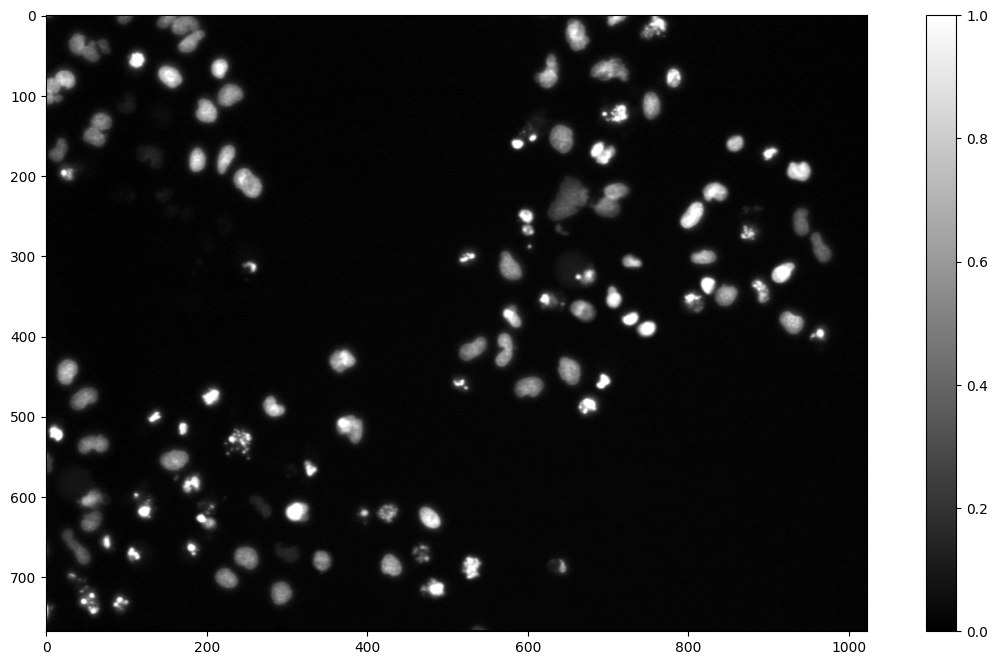

In [42]:
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

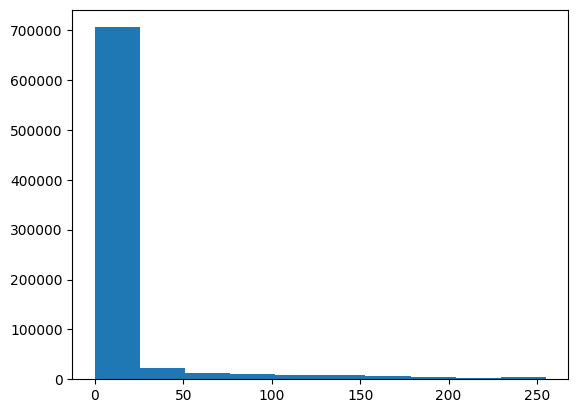

In [24]:
plt.hist(img.flatten())

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [39]:
T1 = 20
T2 = 100

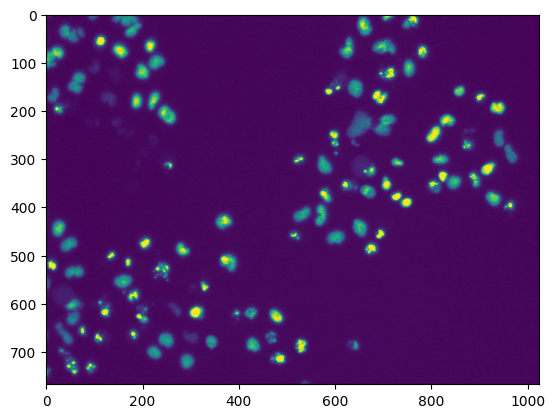

In [37]:
plt.imshow(img)

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

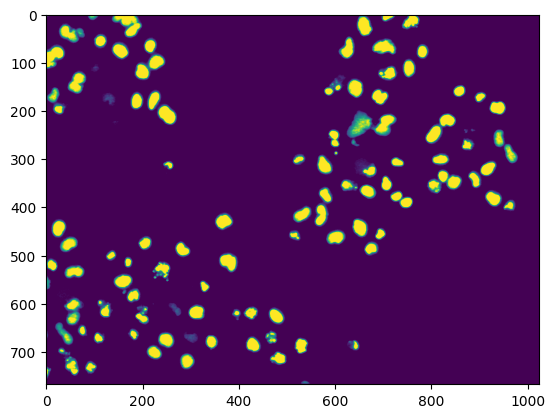

In [40]:
img_clipped=img.clip(T1,T2)
plt.imshow(img_clipped)

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [ ]:
def clip_image(img, T1, T2):
    # here goes your code
    return result

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [ ]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

# here goes your code